In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('cqi_dataset.csv')

In [3]:
df.columns

Index(['ID', 'Species', 'Variety', 'Country', 'Region', 'Altitude',
       'Processing', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects'],
      dtype='object')

# Data exploration

In [4]:
numeric_attributes = df.select_dtypes(include=np.number).columns
numeric_attributes = numeric_attributes.drop('ID')
origin_count = df.Country.value_counts(ascending=True, dropna=False)
origin_count.index

Index([                      'Papua',                 'Ivory Coast',
                         'Mauritius',                      'Zambia',
                            'Rwanda',                       'Japan',
                            'Angola',                  'Madagascar',
                           'Burundi',                           nan,
                           'Ecuador', 'United States (Puerto Rico)',
                              'Laos',                      'Panama',
                       'Philippines',                       'Haiti',
                           'Myanmar',                        'Peru',
                            'Malawi',                       'China',
                             'India',                 'El Salvador',
                         'Indonesia',                     'Vietnam',
                             'Kenya',                   'Nicaragua',
                          'Thailand',                      'Uganda',
                          'Tanzani

Text(0, 0.5, 'Country')

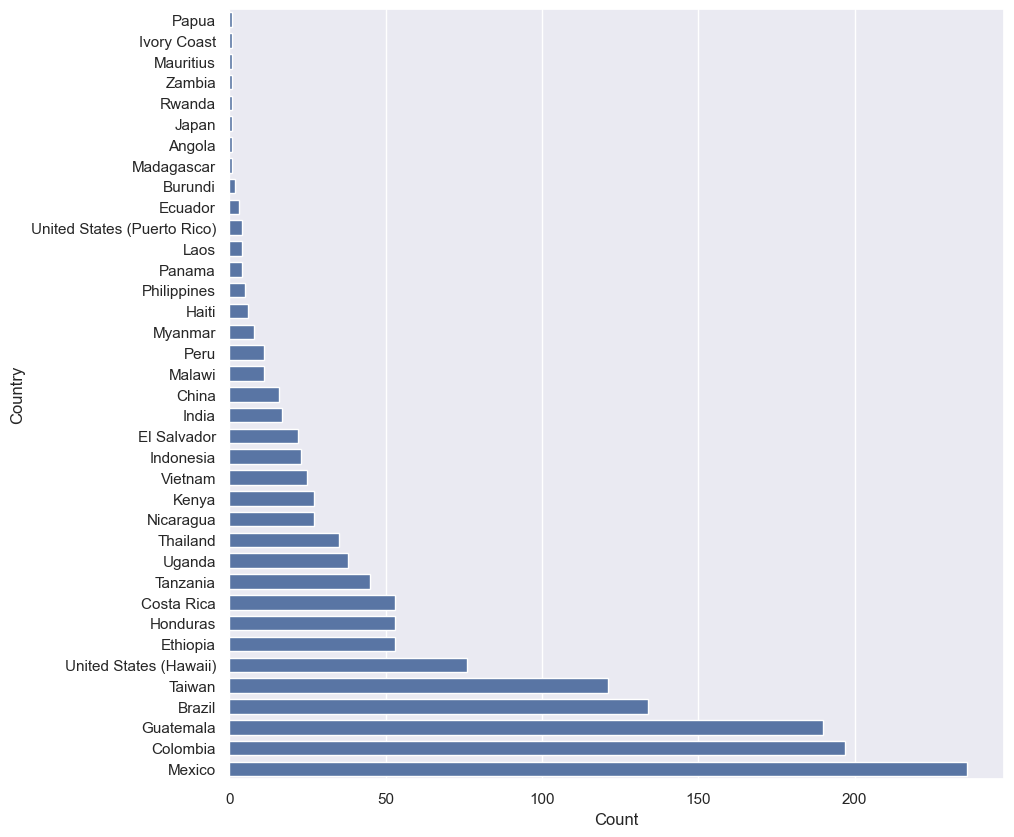

In [5]:
sns.set_theme()
sns.set_theme(style='darkgrid', palette='colorblind', rc={'figure.figsize' : (10, 10)})
colors = sns.color_palette('deep', n_colors=1)
graph = sns.barplot(x=origin_count, y=origin_count.index, width=0.7, palette=colors)
graph.set_xlabel('Count')
graph.set_ylabel('Country')

In [6]:
origin_count

Papua                            1
Ivory Coast                      1
Mauritius                        1
Zambia                           1
Rwanda                           1
Japan                            1
Angola                           1
Madagascar                       1
Burundi                          2
NaN                              2
Ecuador                          3
United States (Puerto Rico)      4
Laos                             4
Panama                           4
Philippines                      5
Haiti                            6
Myanmar                          8
Peru                            11
Malawi                          11
China                           16
India                           17
El Salvador                     22
Indonesia                       23
Vietnam                         25
Kenya                           27
Nicaragua                       27
Thailand                        35
Uganda                          38
Tanzania            

In [7]:

countries_to_keep = origin_count[origin_count >= 20].index

df = df[df.Country.map(lambda x : x in countries_to_keep)]

In [8]:
df_cup = df[['Country', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']]


ID                      False
Species                 False
Variety                  True
Country                 False
Region                   True
Altitude                 True
Processing               True
Aroma                   False
Flavor                  False
Aftertaste              False
Acidity                 False
Body                    False
Balance                 False
Uniformity              False
Clean.Cup               False
Sweetness               False
Cupper.Points           False
Total.Cup.Points        False
Moisture                False
Category.One.Defects    False
Quakers                 False
Color                    True
Category.Two.Defects    False
dtype: bool


<Axes: xlabel='Count', ylabel='Attributes'>

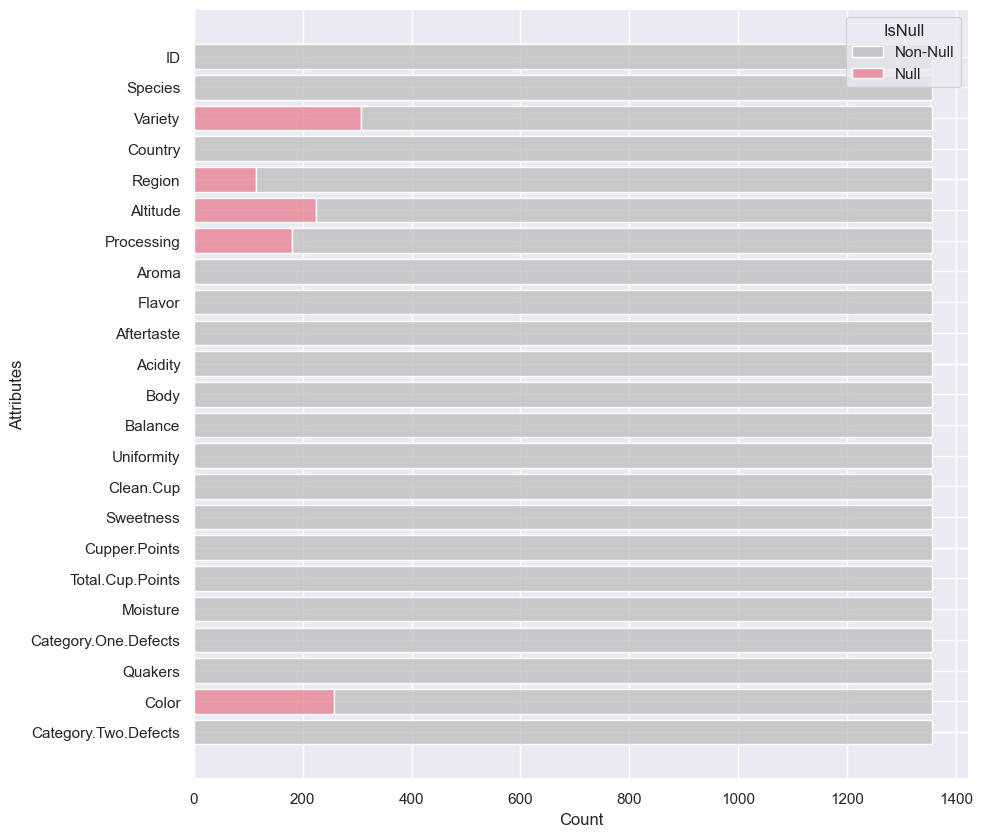

In [9]:
na_info = (df.shape[0] - df.count()).reset_index()
na_info.columns = ['Attributes', 'Null_Count']
print(df.isna().any())

small_na = pd.DataFrame([[3], [1]], index=['null', 'non-null'], columns=['atribute'])

na_info = df.isna().melt()
na_info.columns = ['Attributes', 'IsNull']
na_info = na_info.replace({True : 'Null', False : 'Non-Null'})
na_info

sns.histplot(na_info, y='Attributes', hue='IsNull', multiple='stack', shrink=0.8,palette=sns.color_palette(['#bdbdbd', '#e77c8d']))

<Axes: xlabel='Values', ylabel='Attributes'>

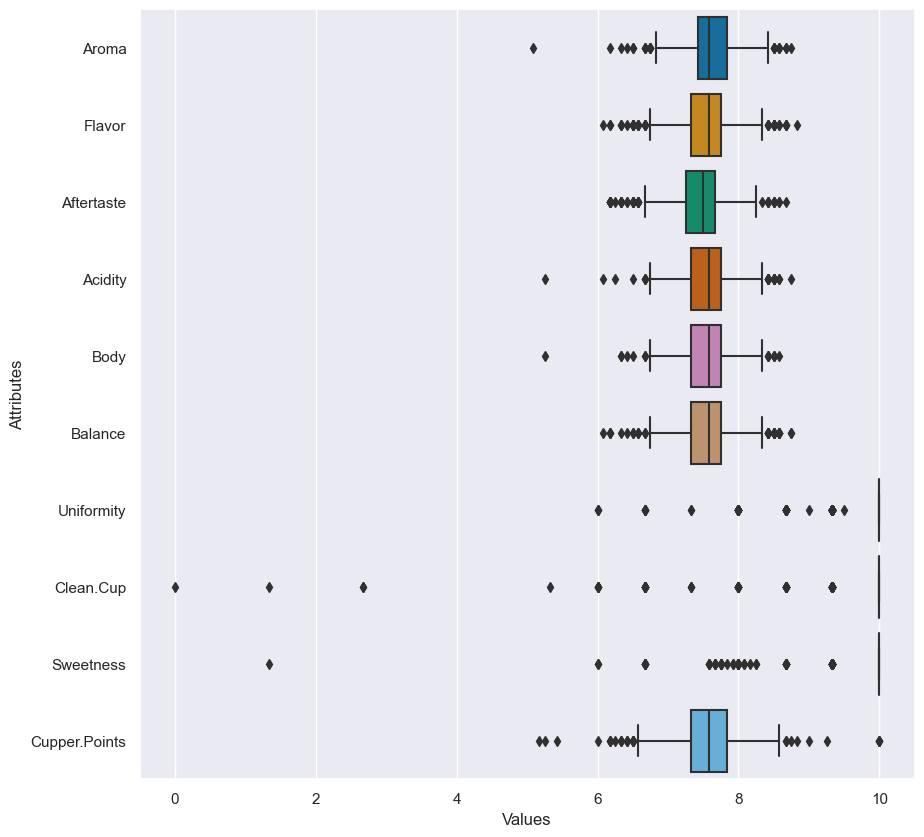

In [10]:
numeric_attributes = df.select_dtypes(include=np.number)
numeric_attributes = numeric_attributes.drop(['ID', 'Altitude', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Category.Two.Defects' ], axis=1)

attribute_stats = numeric_attributes.melt()
attribute_stats.columns = ['Attributes', 'Values']

sns.boxplot(attribute_stats, x='Values', y='Attributes', )

In [11]:
cup_profile = df[['ID', 'Country', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points']]

In [12]:
cupping = ['Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points'] 
labels = ['ID', 'Country', 'Species', 'Variety', 'Altitude']
cup_profile_long = df.melt(id_vars=labels, value_vars=cupping, var_name='Cup', value_name='Score')
cup_profile_long


ID                 Country  Species  Variety  Altitude  \
0           0                Ethiopia  Arabica      NaN    2075.0   
1           1                Ethiopia  Arabica      NaN    2075.0   
2           2               Guatemala  Arabica  Bourbon    1700.0   
3           3                Ethiopia  Arabica      NaN    2000.0   
4           4                Ethiopia  Arabica      NaN    2075.0   
...       ...                     ...      ...      ...       ...   
13545  903758               Guatemala  Arabica    Gesha    1900.0   
13546  279151                Thailand  Arabica  Catimor    1350.0   
13547  858598                Colombia  Arabica  Caturra    1700.0   
13548  187142  United States (Hawaii)  Arabica   Typica     500.0   
13549  725292                  Taiwan  Arabica     SL34    1025.0   

                 Cup  Score  
0              Aroma   8.67  
1              Aroma   8.75  
2              Aroma   8.42  
3              Aroma   8.17  
4              Aroma   8.25  
...              ...    ...  
13545  Cupper.Points   7.75  
13546  Cupper.Points   7.75  
13547  Cupper.Points   7.58  
13548  Cupper.Points   7.72  
13549  Cupper.Points   7.67  

[13550 rows x 7 columns]

In [13]:
xlabels = cup_profile_long.Cup.unique()

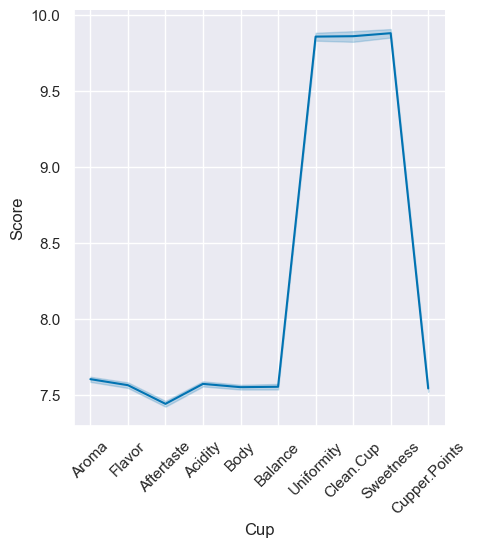

In [14]:
graph = sns.relplot(cup_profile_long, x='Cup', y='Score', kind='line')
graph.set_xticklabels(labels=xlabels, rotation=45)
#graph.ax.set_ylim(0, 10)

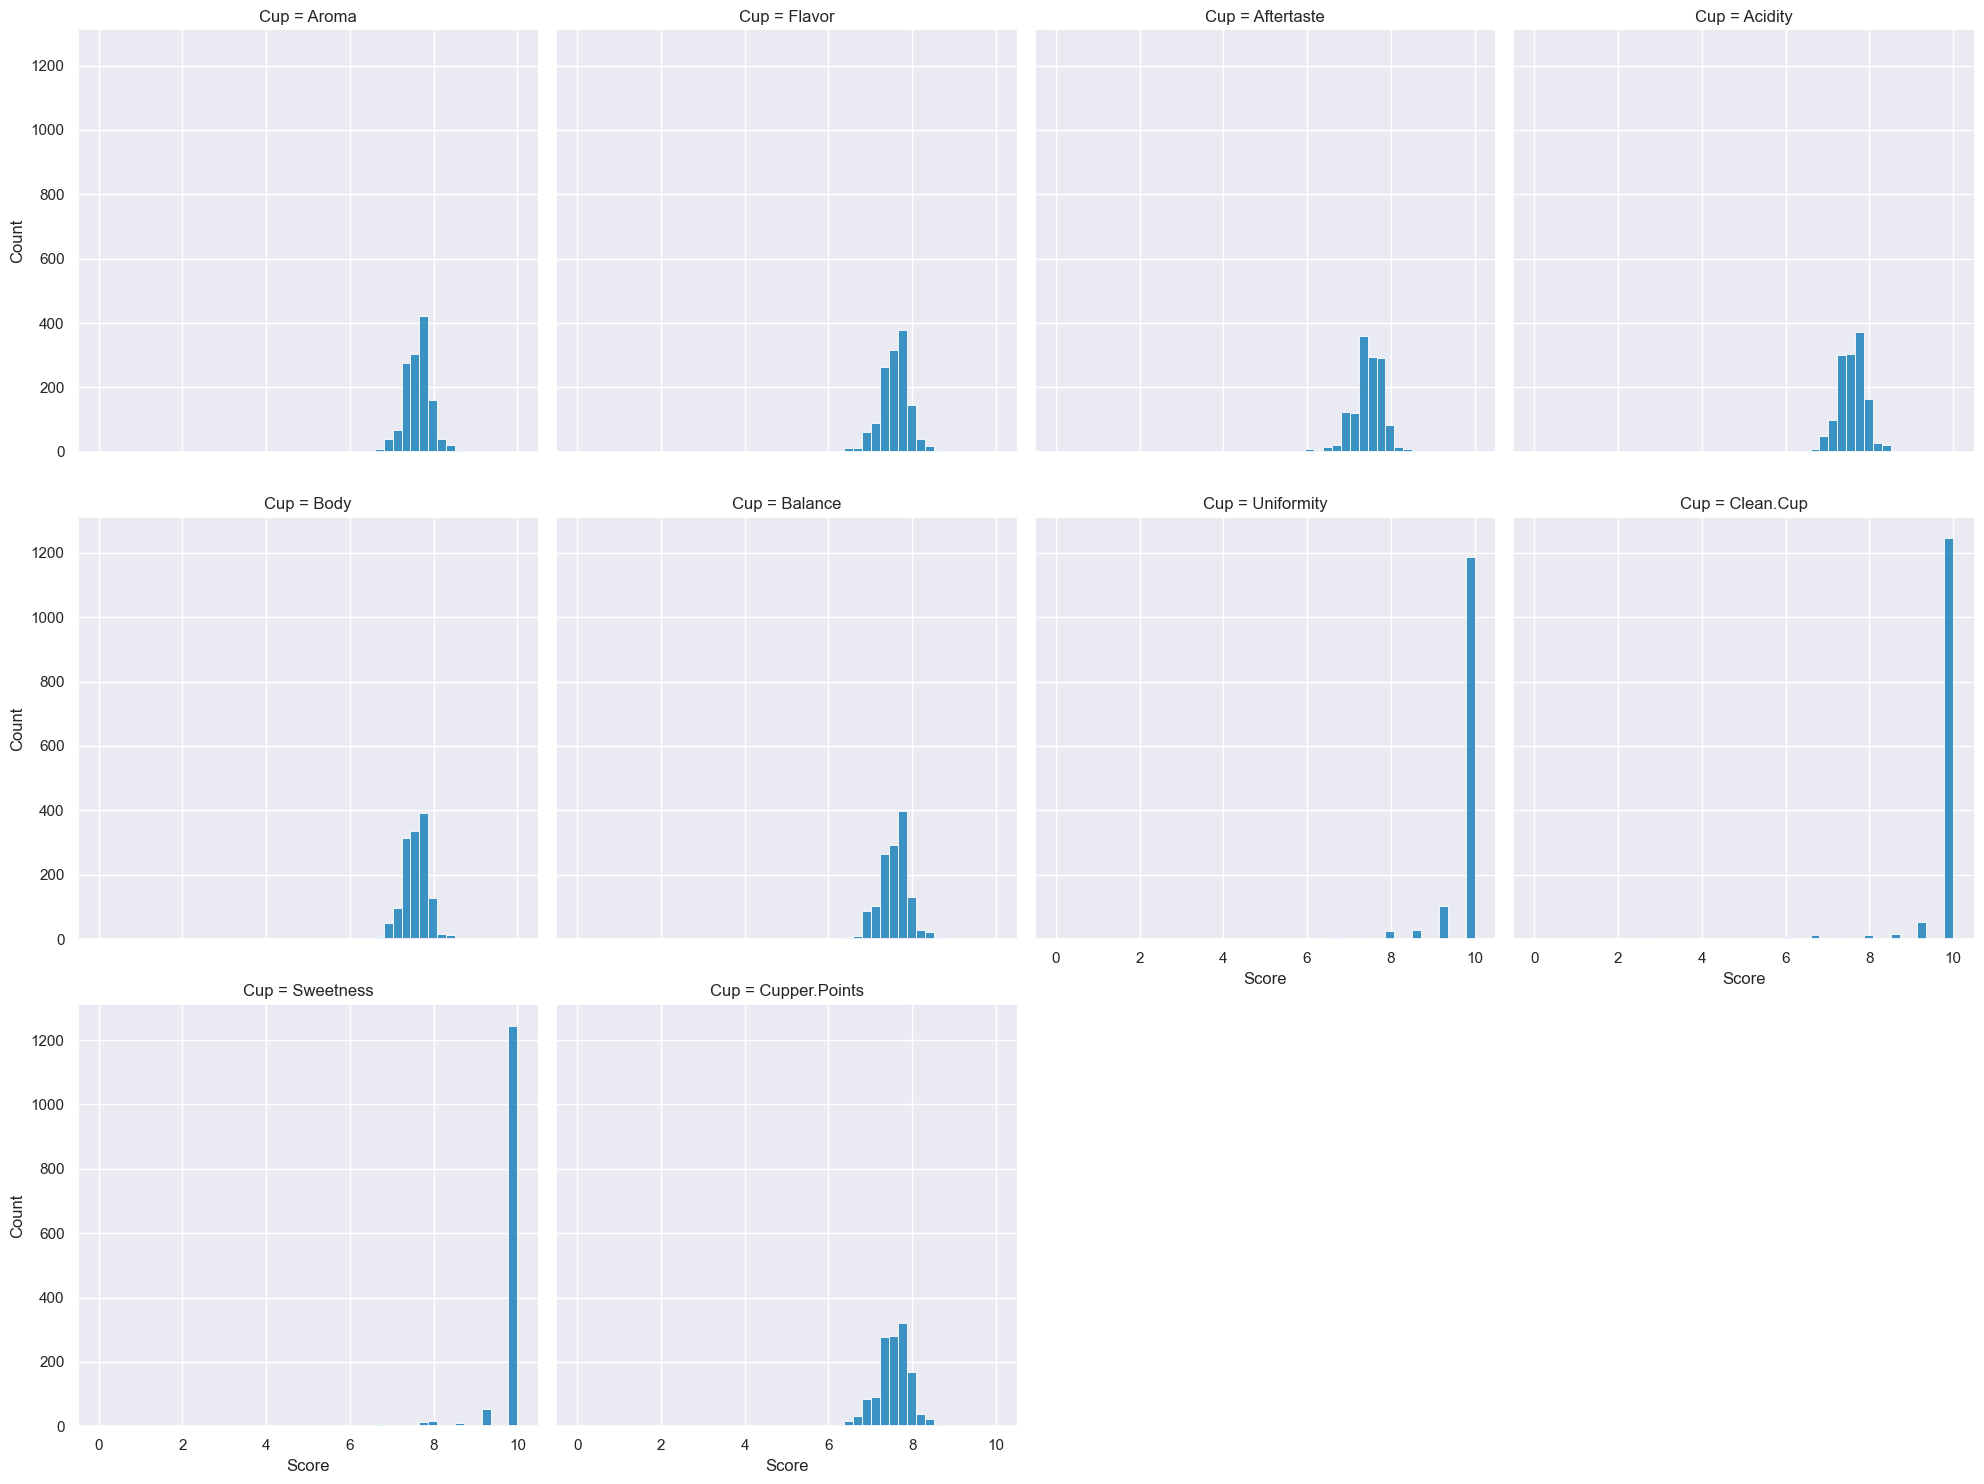

In [15]:
sns.displot(cup_profile_long, x='Score', col='Cup', kind='hist', col_wrap=4)

In [16]:
array = np.array([1, 2, 4, 5, 6])
foo = np.vectorize((lambda x : 'hi'))
foo(array)
#np.apply_along_axis((lambda x : 1),arr=array, axis=0)

array(['hi', 'hi', 'hi', 'hi', 'hi'], dtype='<U2')

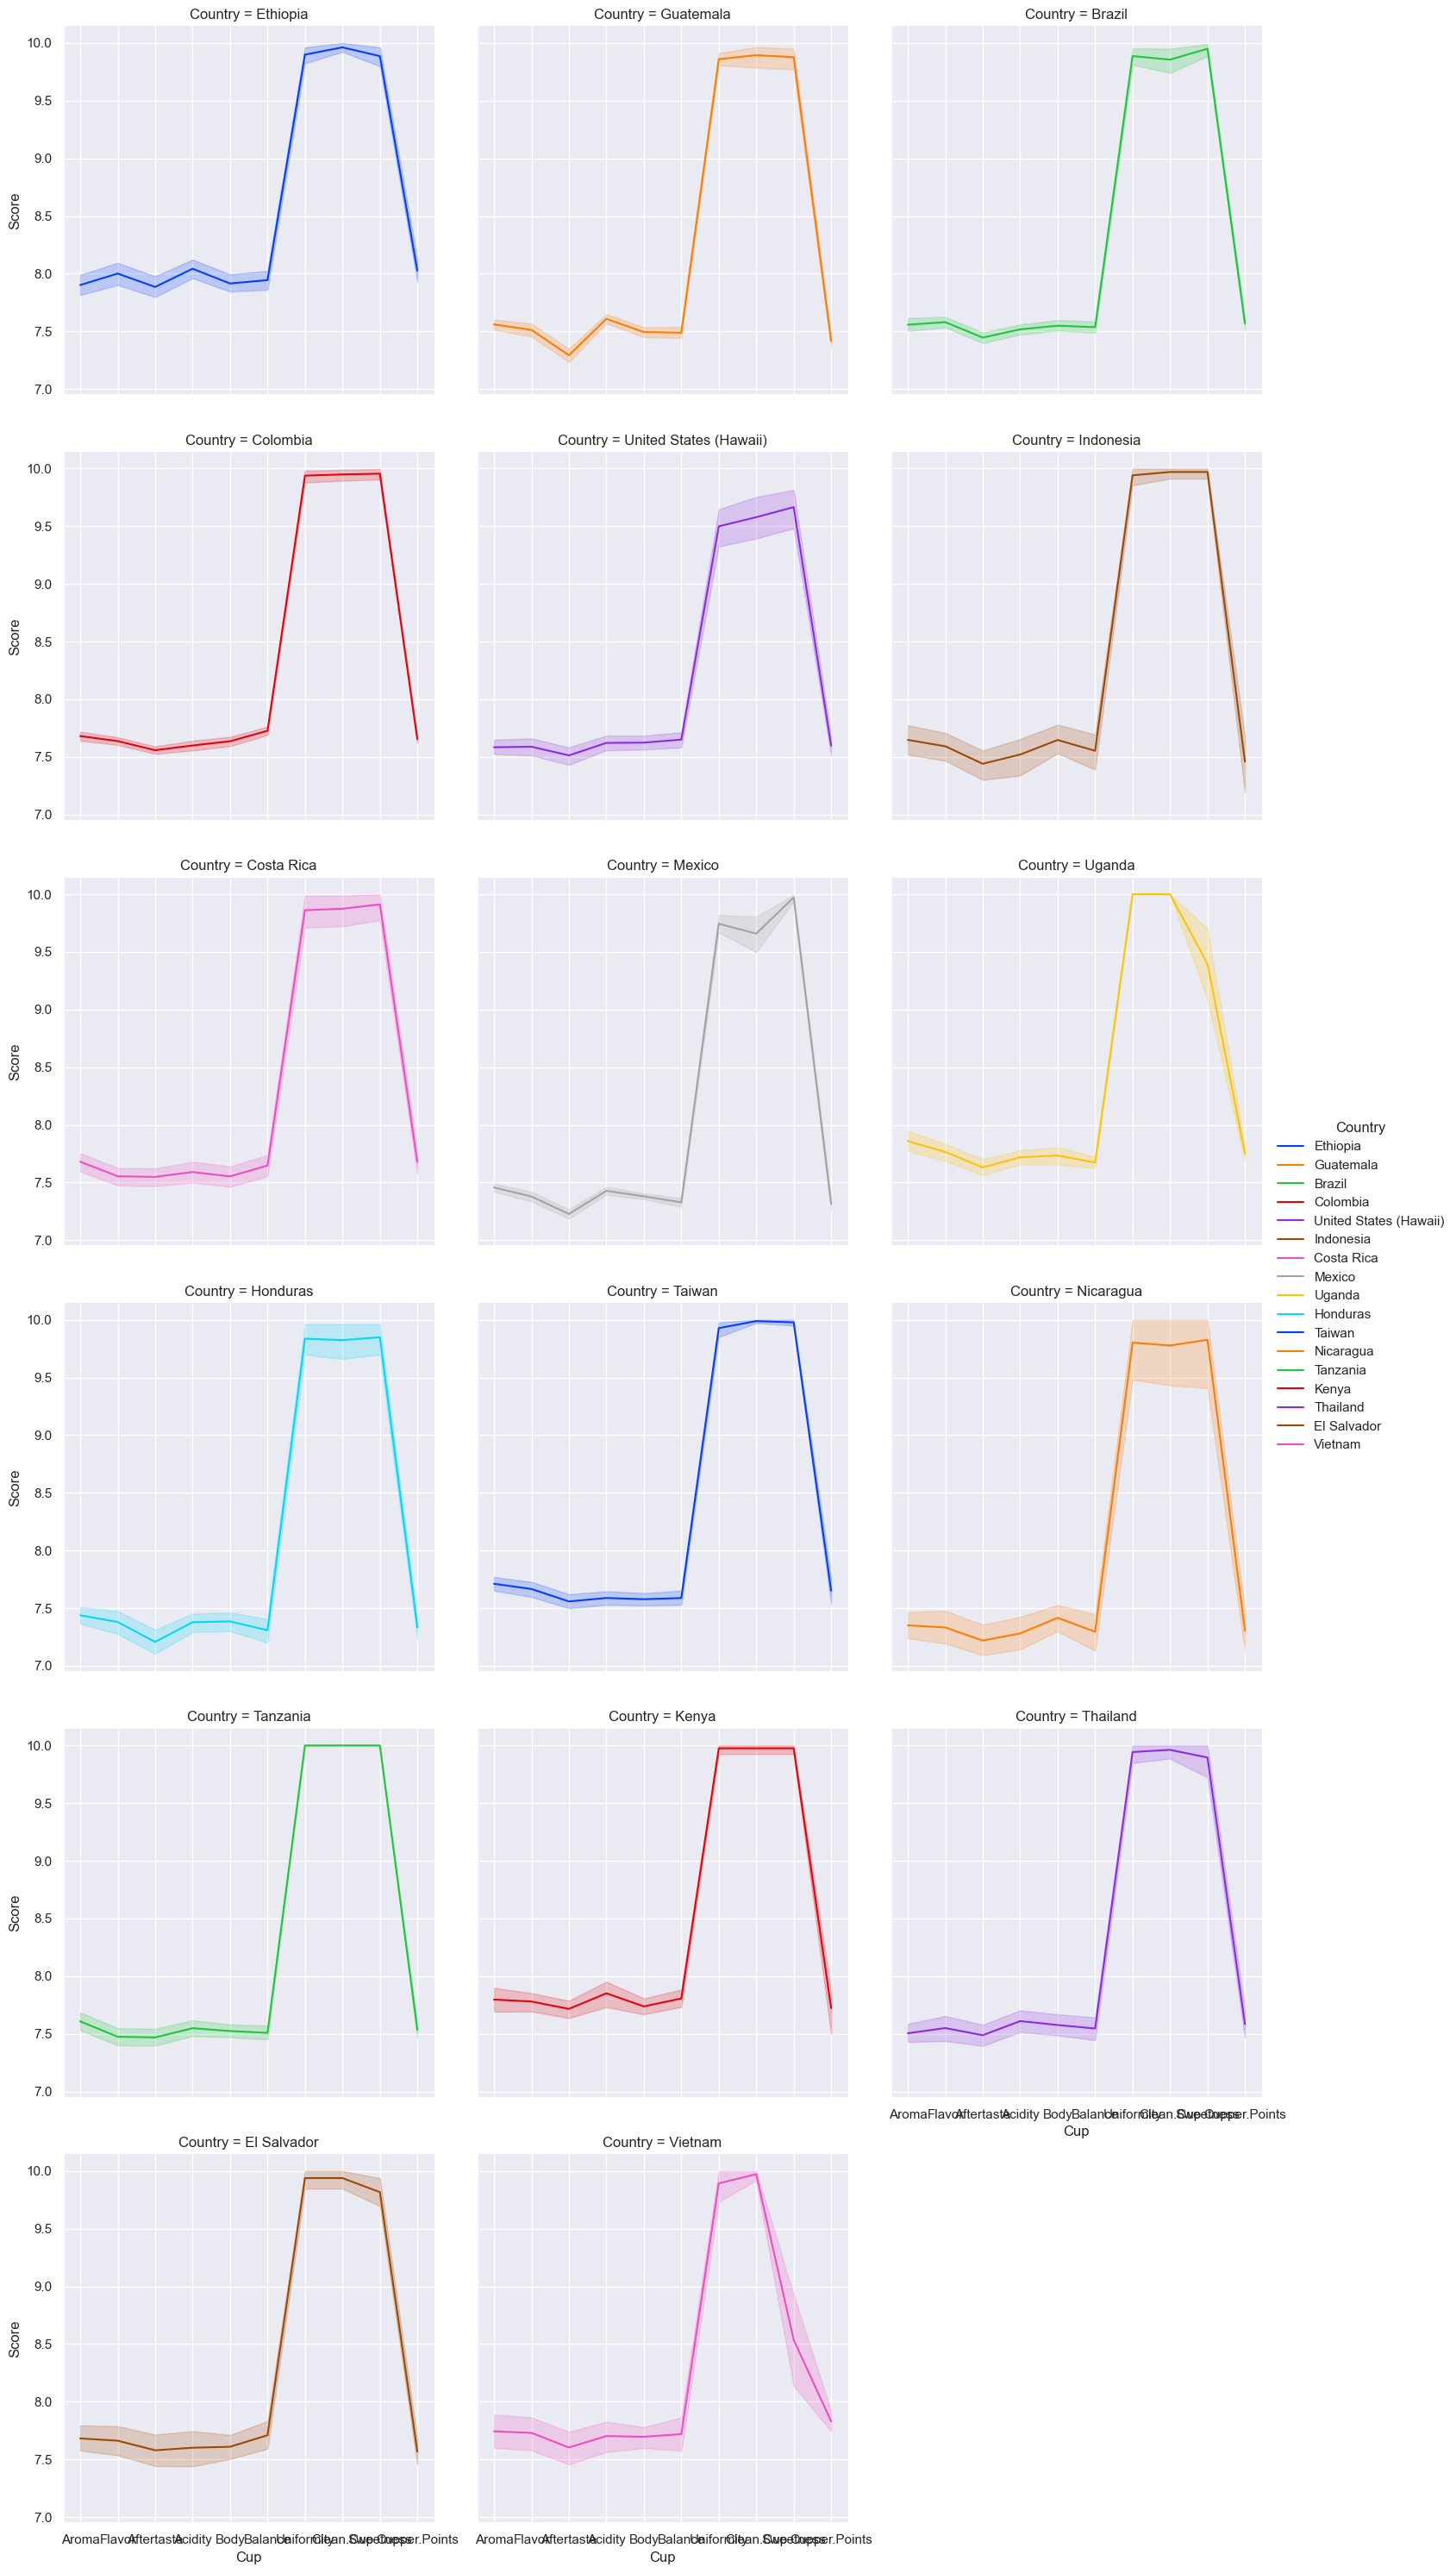

In [17]:
graph = sns.relplot(cup_profile_long, x='Cup', y='Score', kind='line', col='Country', col_wrap=3, hue='Country', palette='bright')
graphs = graph.axes

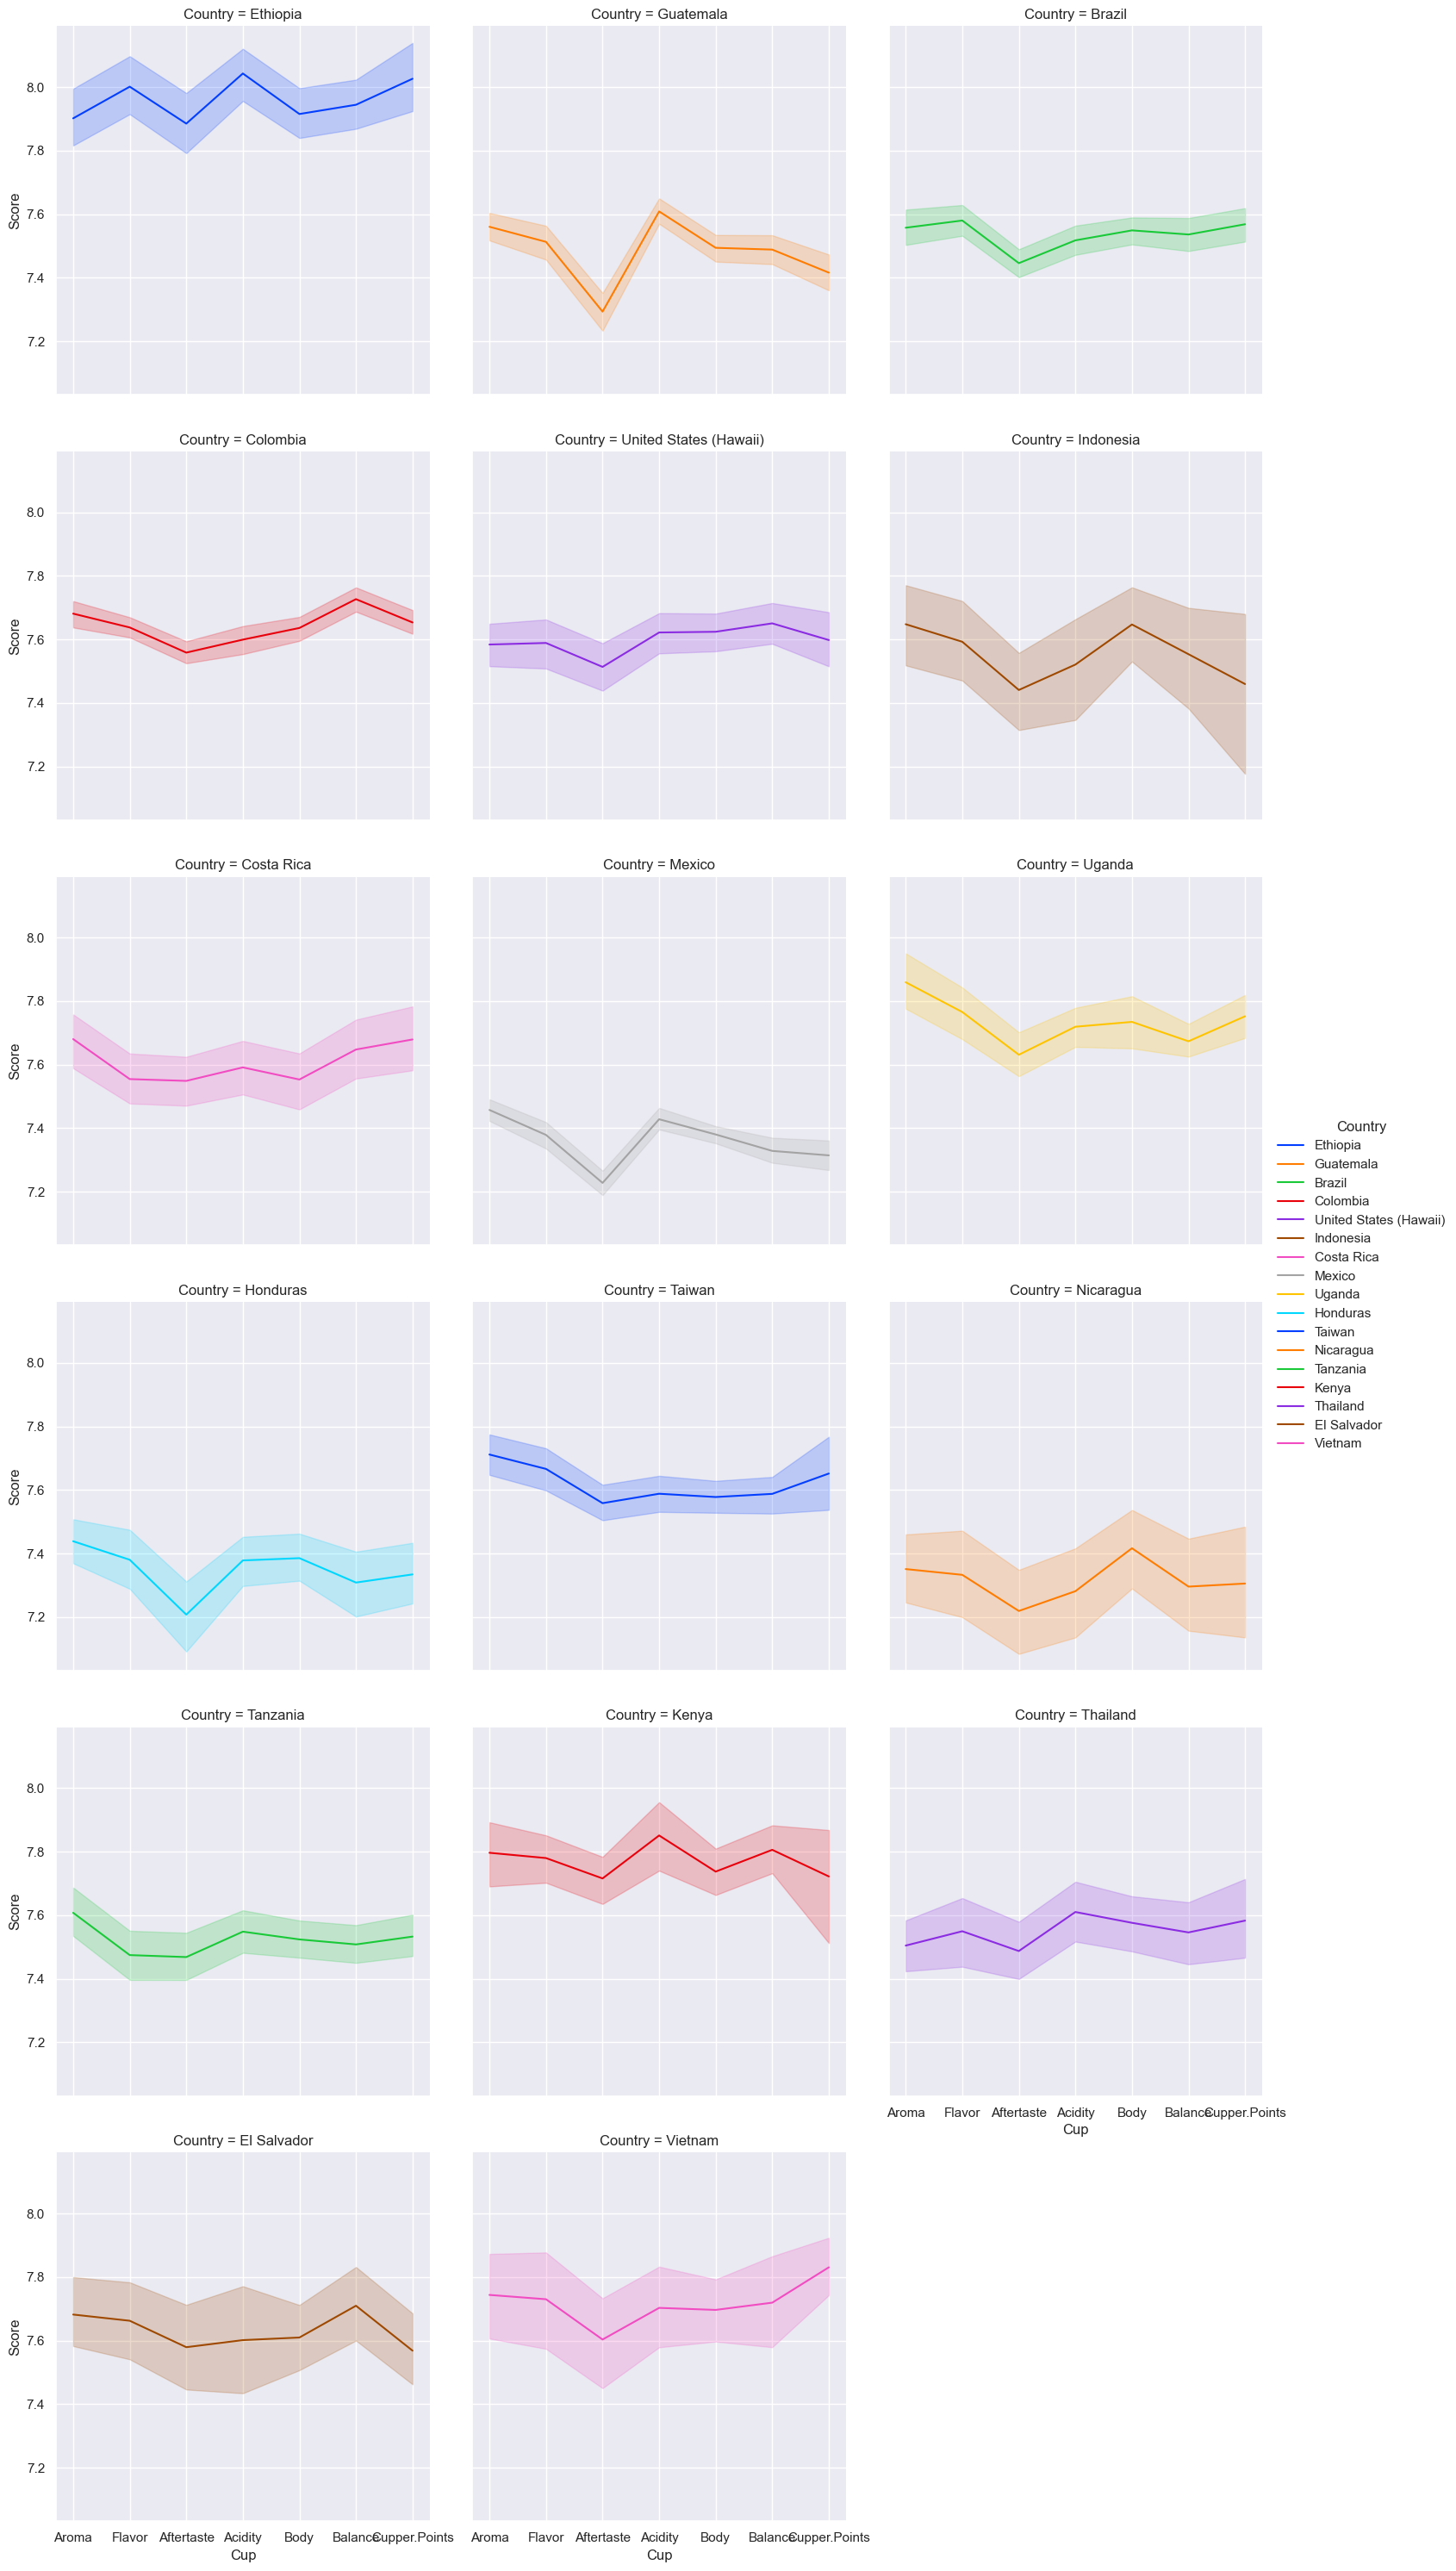

In [18]:
cupping = ['Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance',
       'Cupper.Points'] 
labels = ['ID', 'Country', 'Species', 'Variety', 'Altitude']
cup_profile_long = df.melt(id_vars=labels, value_vars=cupping, var_name='Cup', value_name='Score')
graph = sns.relplot(cup_profile_long, x='Cup', y='Score', kind='line', col='Country', col_wrap=3, hue='Country', palette='bright')
graphs = graph.axes
#graphs[0].set_xticklabels(labels=xlabels, rotation=45)
##foo = np.vectorize((lambda x : x.set_xticklabels(labels=xlabels, rotation=45)))
#foo(graphs)

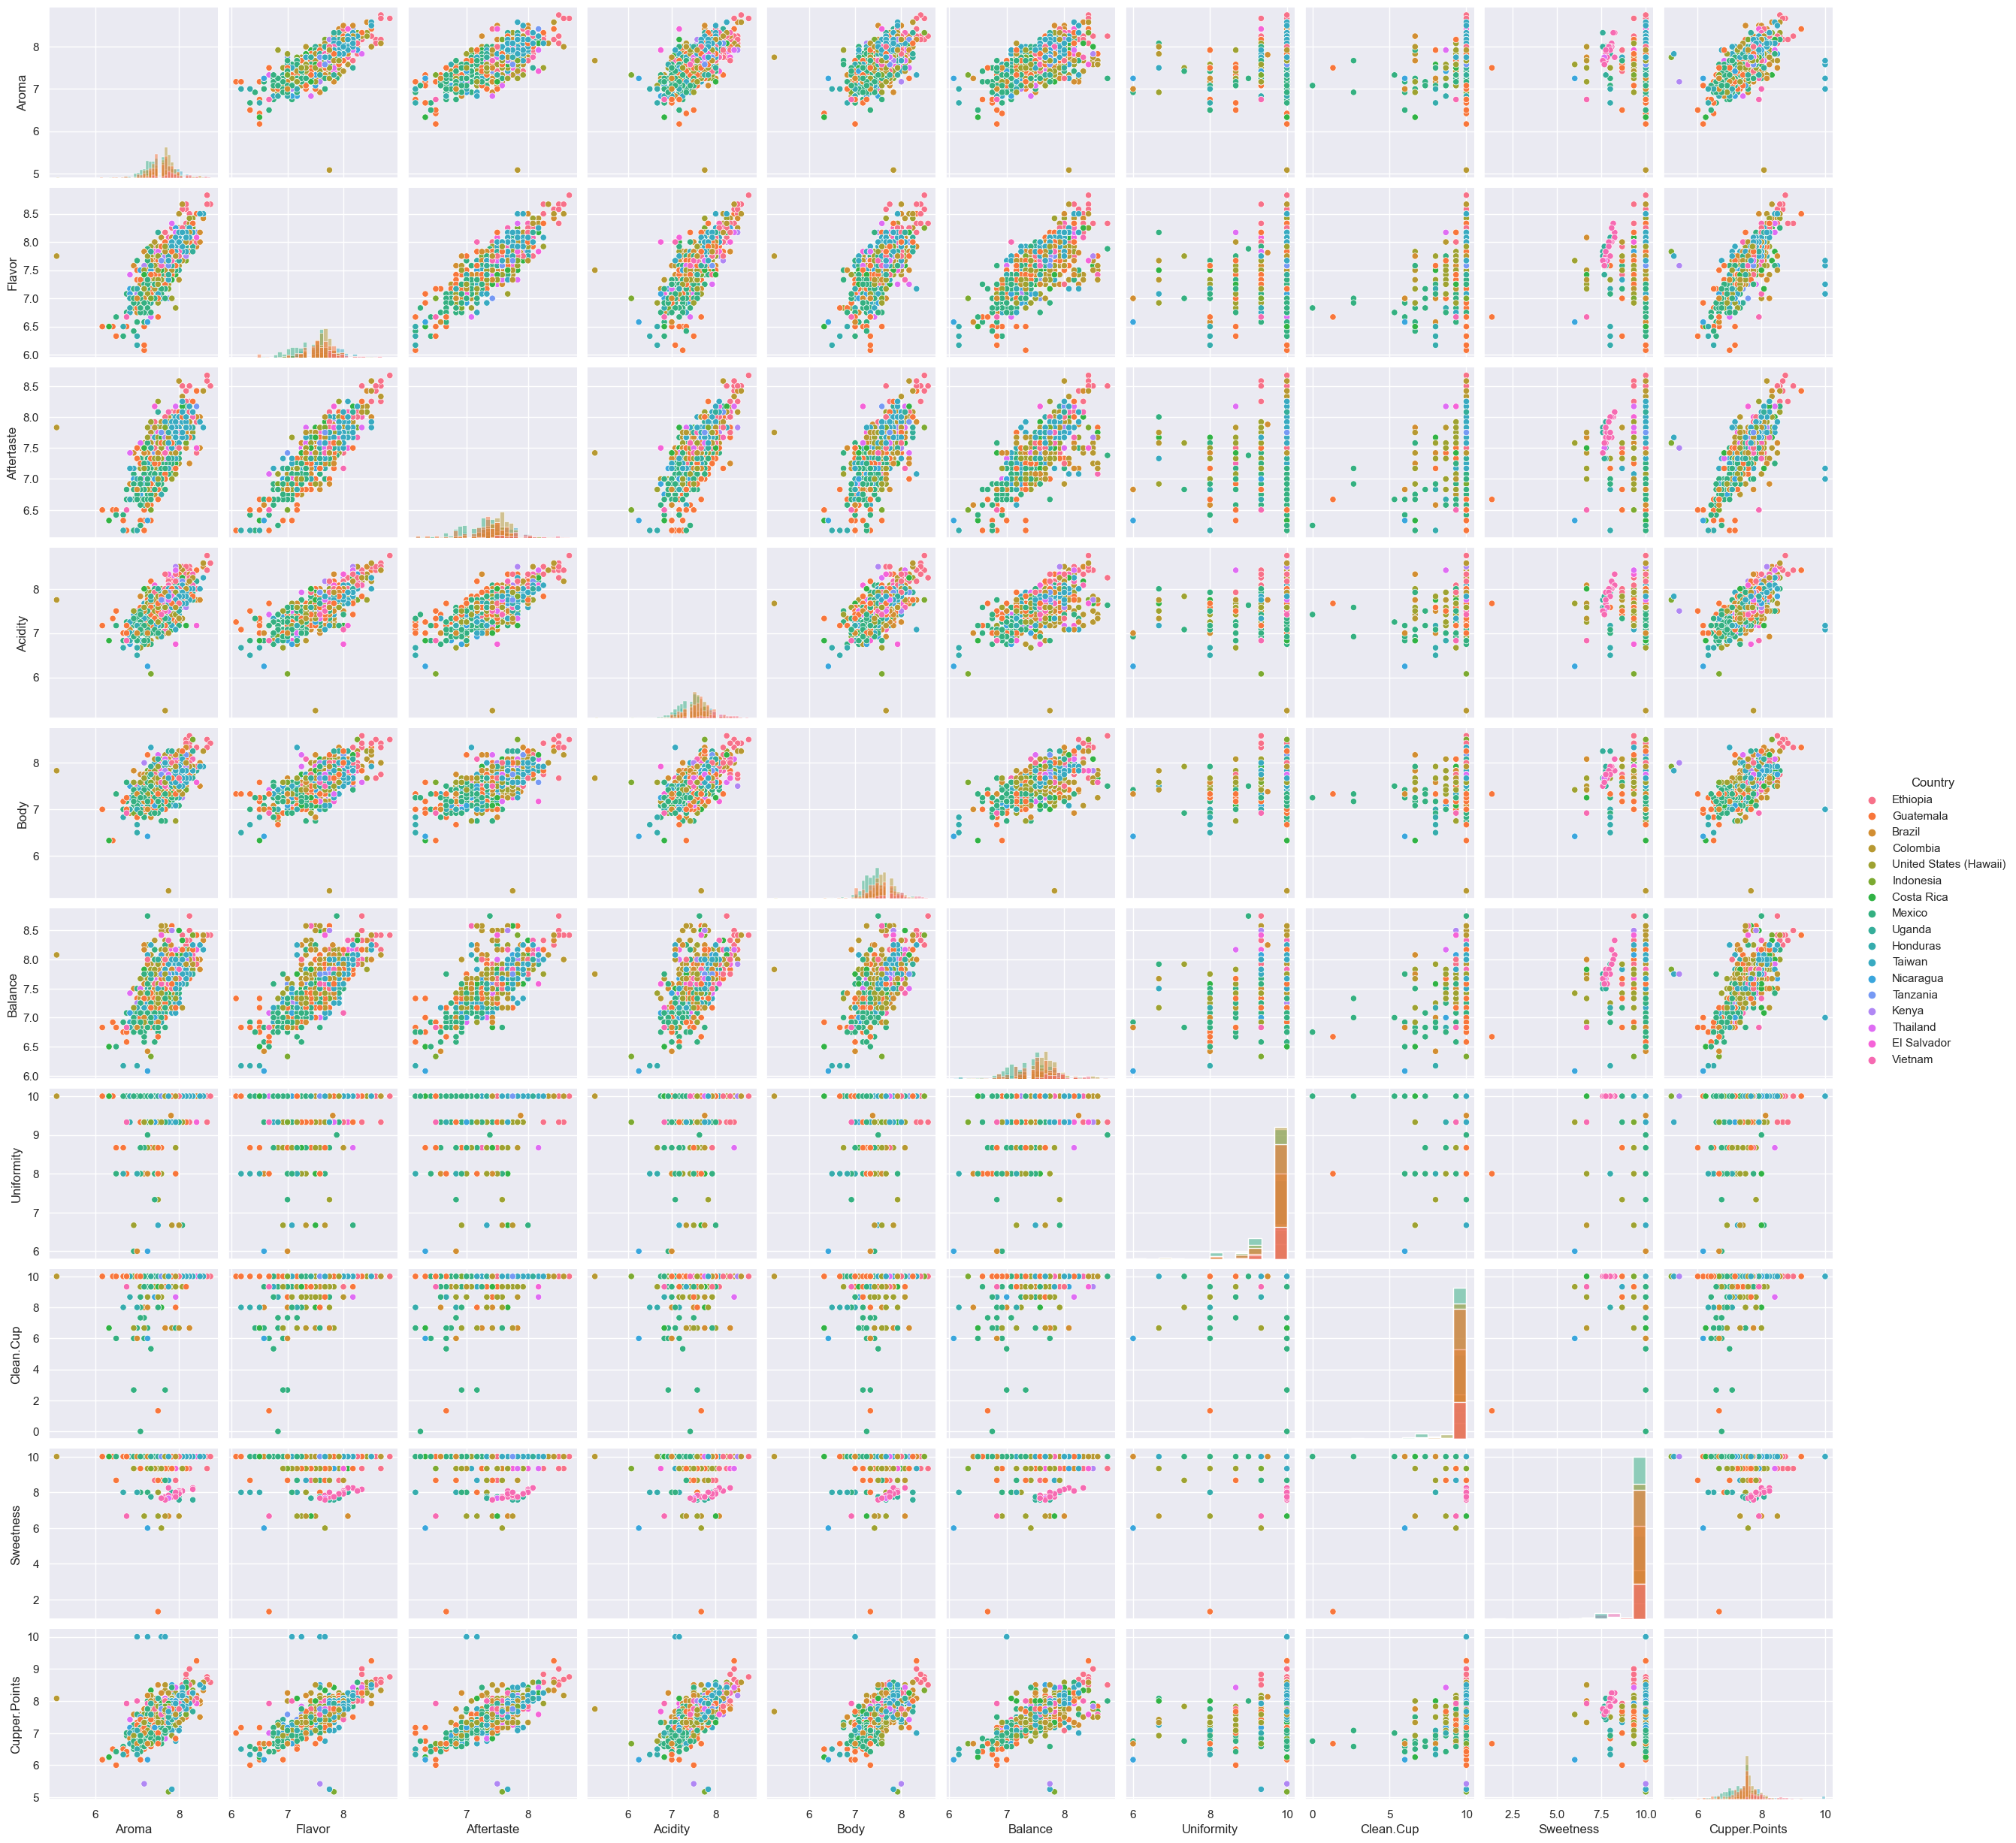

In [19]:
sns.pairplot(df_cup, hue='Country', diag_kind='hist')

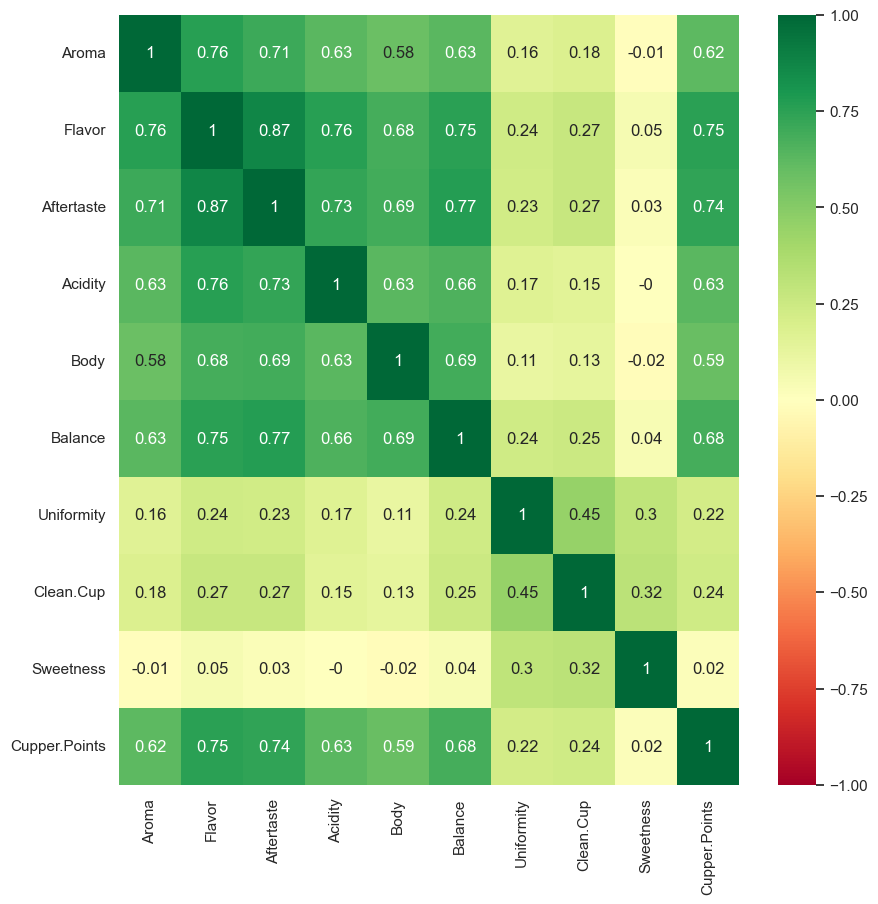

In [20]:
cupping = df_cup.drop('Country', axis=1)
corr = cupping.corr().round(decimals=2)


ax = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='RdYlGn')

# PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import k_means

In [22]:
df_cup.dropna()
len(df_cup.Country.unique())

17

In [23]:
def get_train(df):
    X, y = df.loc[:, df.columns != 'Country'], df.Country
    X_train, _, y_train, _ = train_test_split(X, y)
    return X_train, y_train

In [24]:
X_train, y_train = get_train(df_cup)

In [25]:
def show_pca(X_train, y_train):
    pca = PCA()
    sd = StandardScaler()
    pipe = make_pipeline(sd, pca)
    coffee_pca = pipe.fit_transform(X_train)
    #palette = sns.color_palette('huls', len(y_train.unique()))
    g = sns.relplot(x=coffee_pca[:, 0], y=coffee_pca[:, 1], hue=y_train, kind='scatter', facet_kws={'legend_out' : False}, legend='full')
    g.ax.legend(ncols=2, loc=(1.1, 0), facecolor='w', edgecolor='w')

    return coffee_pca



array([[ 1.80100899e+00, -7.60789321e-01,  1.99525698e-01, ...,
         5.61497324e-01, -1.12441074e-01, -3.35844296e-01],
       [ 4.47666386e-01, -5.58746945e-01,  6.20498909e-02, ...,
        -2.60152775e-01, -7.75662020e-01,  5.05192365e-01],
       [ 3.26641274e+00,  6.63996581e-01, -1.20715303e+00, ...,
         1.03699334e-01, -6.56910906e-01,  1.40418979e-01],
       ...,
       [-4.41828663e-01, -3.98779099e-01,  4.56148318e-03, ...,
         2.97690783e-01,  1.87208028e-01, -2.39434958e-02],
       [-5.27003785e+00,  3.18515862e-01, -4.11793555e-01, ...,
        -1.42184913e-01, -1.51488402e+00, -2.42734874e-01],
       [-1.09446711e+00, -3.19222335e-01, -7.05938906e-02, ...,
         2.09731619e-01, -2.14933277e-01,  4.30297234e-01]])

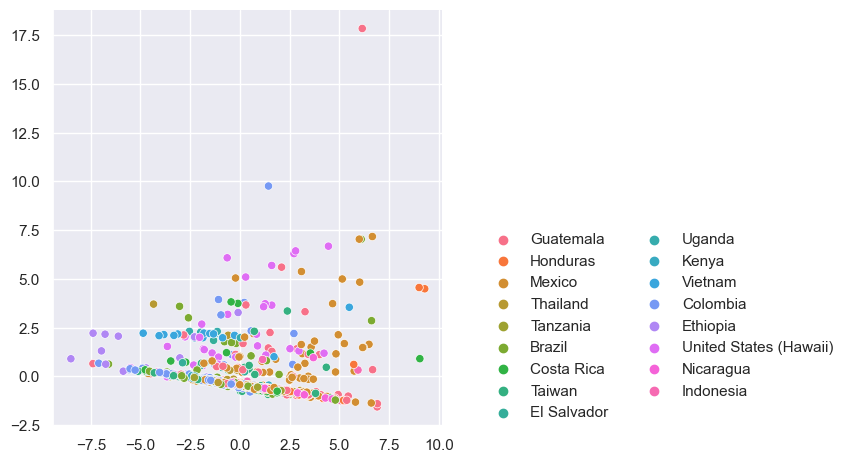

In [26]:
show_pca(X_train, y_train)

In [27]:
df_cup_excluded = df_cup.drop(['Sweetness','Uniformity', 'Clean.Cup'], axis=1)
X_ex, y_ex = get_train(df_cup_excluded)

array([[ 0.77480881, -0.13101171, -0.20460343, ...,  0.18211598,
         0.05704635, -0.03793762],
       [-0.26623923, -0.06372741,  0.02580116, ..., -0.07606425,
        -0.10404899, -0.43187617],
       [ 0.28832072, -0.33340309,  0.4740354 , ..., -0.04950378,
        -0.07680685,  0.33840633],
       ...,
       [ 0.55458185,  0.14503149, -0.08482622, ...,  0.11897496,
        -0.3024427 , -0.74532379],
       [-2.4923081 ,  0.21989923, -0.47010759, ..., -0.23039719,
         0.67497228,  0.04731595],
       [ 1.81466221,  0.61440995,  0.13877691, ..., -0.3872212 ,
        -0.26520267, -0.82723841]])

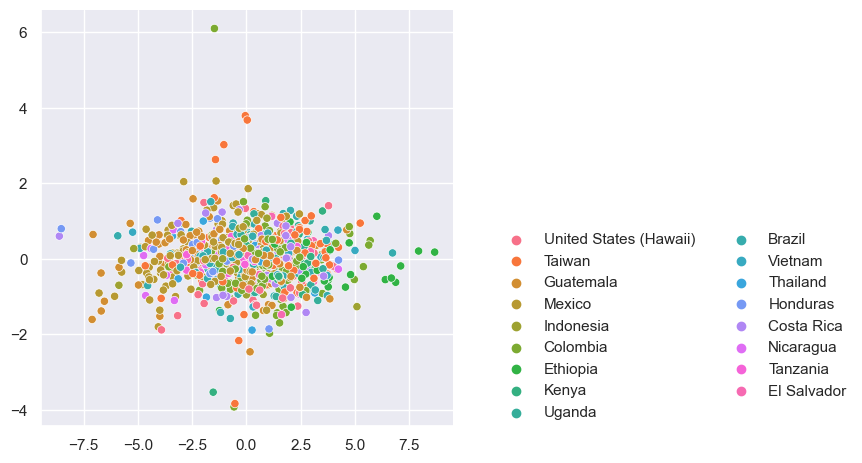

In [28]:
show_pca(X_ex, y_ex)

In [29]:
def show_kmeans(X_train):
    coffee_kmeans = k_means(X_train, n_init='auto', n_clusters=len(y_train.unique()))
    kmeans_labels = coffee_kmeans[:][1]
    show_pca(X_train, kmeans_labels)

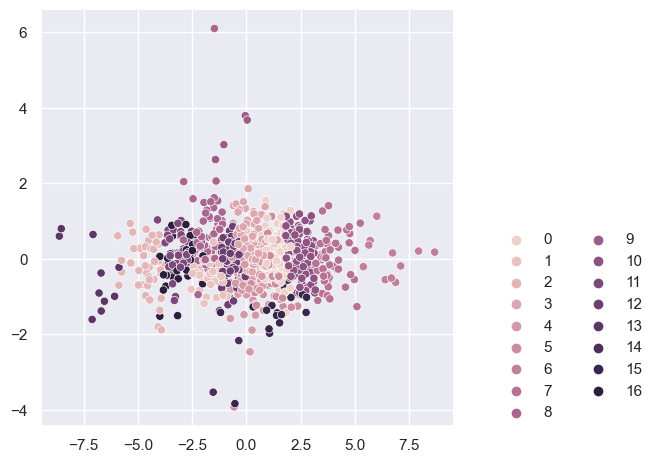

In [30]:
show_kmeans(X_ex)

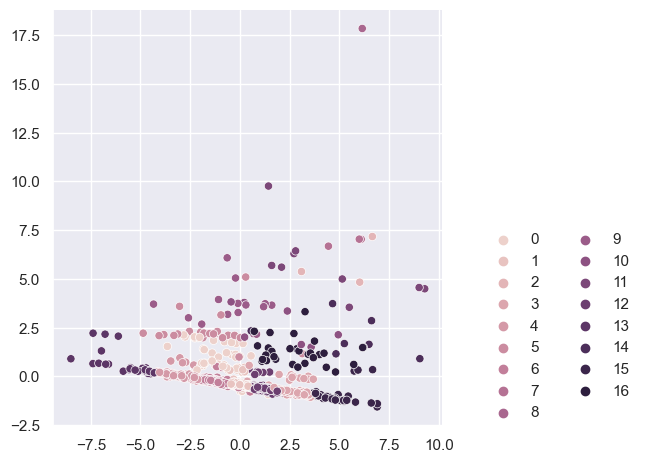

In [31]:
show_kmeans(X_train)

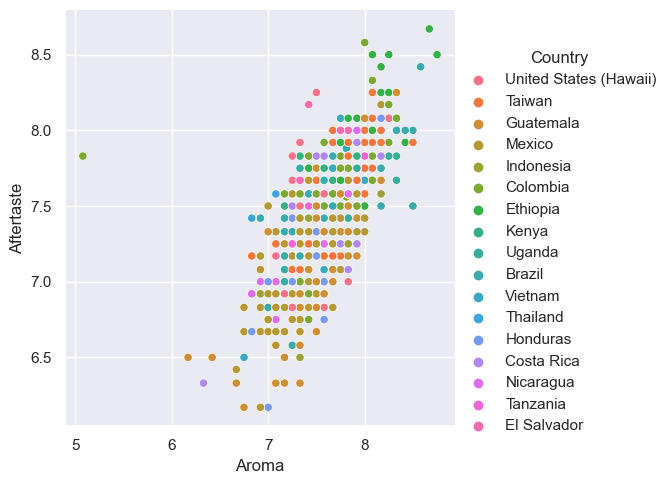

In [32]:
sns.relplot(X_ex, x='Aroma', y='Aftertaste', kind='scatter', hue=y_ex)

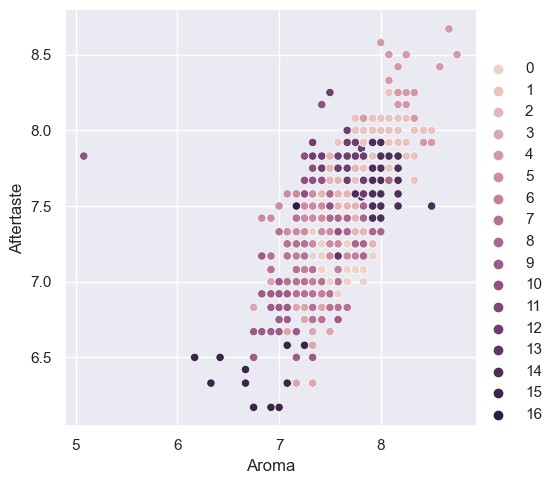

In [33]:
k_labels = k_means(X_ex, n_clusters=len(y_ex.unique()), n_init='auto')[:][1]
sns.relplot(X_ex, x='Aroma', y='Aftertaste', kind='scatter', hue=k_labels, legend='full')